In [110]:
from startSimulation import *
import postProcessing
import matplotlib.pyplot as plt
%matplotlib inline  

In [108]:
params = {'NAME_CONFIGFILE' : ''}
params['NAME_RESULTFILE'] = ''

params['NAME_CONFIGFILE'] = 'PARAMETERS.INI'
run_script = 'RUN_HELPER.sh'

parse_config_file(params)
check_variables(params)
calc_variables(params)
check_stability(params)
if params['USE_MRI_FILE'] == False:
    create_region_file(params)
create_init_file(params)
set_environment_variables(params)

Parsing PARAMETERS.INI.
Done.
Checking variables.
* WARNING: CHECK_CONV_FIRST_AT_ITER < 1.
  CHECK_CONV_FIRST_AT_ITER is assumend to be a ratio.
* WARNING: CHECK_CONV_AT_EVERY_N_ITER < 1.
  CHECK_CONV_AT_EVERY_N_ITER is assumend to be a ratio.
Done.
Calculating variables.
* WARNING: N_TIMESTEPS not specified.
  Calculate N_TIMESTEPS from stability criterion.
Done.
Checking stability.
Done.
Creating region.nc.
Done.
Creating init.nc.
Done.
Setting environment variables.
Done.


Start simulation

In [109]:
pResults = call_simulation(params, run_script)

Searchpath ./MRIDataPBHEqnFDM3D_PARAMETERS_*.nc
['./MRIDataPBHEqnFDM3D_PARAMETERS_1_1_120x120x50.nc']
Starting MRIDataPBHEqnFDM3D.


Done.
['./MRIDataPBHEqnFDM3D_PARAMETERS_1_1_120x120x50.nc']
./MRIDataPBHEqnFDM3D_PARAMETERS_1_1_120x120x50.nc


Load simulated data cube into python

In [111]:
temperatures = postProcessing.temperature_array_from_result(params['NAME_RESULTFILE'])

Read ./MRIDataPBHEqnFDM3D_PARAMETERS_1_1_120x120x50.nc.


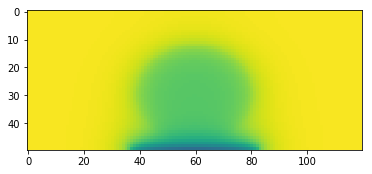

In [112]:
plt.imshow(temperatures[:,60,:], vmin=33, vmax=36.6)
plt.show()

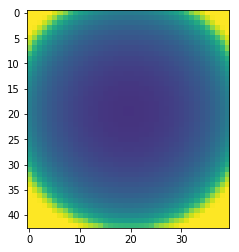

In [113]:
plt.imshow(temperatures[-1,40:83,40:80], vmin=34, vmax=36)
plt.show()

In [114]:
tumor = postProcessing.region_array_from_file(params['NAME_REGION_FILE'])
initFile = postProcessing.array_from_file('./init', 'omega')

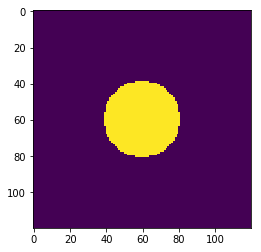

In [115]:
plt.imshow(tumor[30,:,:])
plt.show()

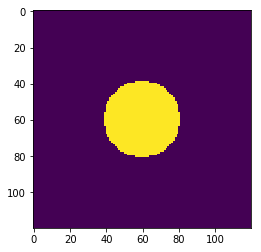

In [116]:
plt.imshow(initFile[30,:,:])
plt.show()

In [117]:
params['TUMOR']

{'RHO': 1040.0,
 'C': 3650.0,
 'LAMBDA': 0.6,
 'RHO_BLOOD': 1052.0,
 'C_BLOOD': 3800.0,
 'OMEGA': 0.00975,
 'T_BLOOD': 35.0,
 'Q': 25000.0,
 'T': 37.0}

In [118]:
params['BRAIN']

{'RHO': 1040.0,
 'C': 3650.0,
 'LAMBDA': 0.6,
 'RHO_BLOOD': 1052.0,
 'C_BLOOD': 3800.0,
 'OMEGA': 0.004,
 'T_BLOOD': 35.0,
 'Q': 25000.0,
 'T': 37.0}

# Some evaluations

In [119]:
T_tumor = tumor_near_surface_temperatures(params['NAME_RESULTFILE'],
                                          params['NAME_REGION_FILE'])
brain_temperatures(params['NAME_RESULTFILE'],
                   params['NAME_REGION_FILE'])
domain_temperatures(params['NAME_RESULTFILE'])


Calc tumor temperatures near surface of ./MRIDataPBHEqnFDM3D_PARAMETERS_1_1_120x120x50.nc.
Read ./MRIDataPBHEqnFDM3D_PARAMETERS_1_1_120x120x50.nc.
Mean temp of tumor near surface (first 10 nodes): 35.670.
Max temp of tumor near surface (first 10 nodes): 36.019.
Min temp of tumor near surface (first 10 nodes): 35.128.
Std dev temp of tumor near surface (first 10 nodes): 0.1630.
Write results to ./MRIDataPBHEqnFDM3D_PARAMETERS_1_1_120x120x50_results.dat.
Done.

Calc brain temperatures of ./MRIDataPBHEqnFDM3D_PARAMETERS_1_1_120x120x50.nc.
Read ./MRIDataPBHEqnFDM3D_PARAMETERS_1_1_120x120x50.nc.
Mean temp of brain: 36.519.
Max temp of brain: 36.565.
Min temp of brain: 34.296.
Std dev temp of brain: 0.1696.
Write results to ./MRIDataPBHEqnFDM3D_PARAMETERS_1_1_120x120x50_results.dat.
Done.

Calc domain temperatures of ./MRIDataPBHEqnFDM3D_PARAMETERS_1_1_120x120x50.nc.
Read ./MRIDataPBHEqnFDM3D_PARAMETERS_1_1_120x120x50.nc.
Mean temp of domain: 36.487.
Max temp of domain: 36.565.
Min temp of 

36.487352063857145

In [120]:
params['T_NORMAL']

32.8

In [121]:
params['T_TUMOR']

30.0

In [122]:
params['T_VESSEL']

34.5